In [1]:
import os
os.chdir('../..')
!ls

future_trade


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pyomo.environ import *
from pyomo.mpec import *
import math
import datetime
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from future_trade.spatial_trade_model.functions_general import *
from future_trade.spatial_trade_model.functions_calibration import *
from pathos.multiprocessing import ProcessPool, cpu_count

In [3]:
data_dir = '../../OPSIS/Data/Trade_clearance_model'
calibration_output = f'{data_dir}/Output/Calibration/'

In [4]:
for crop_code in [
    'jwhea', 'jrice', 'jmaiz', 'jbarl', 'jmill', 'jsorg', 
    'jocer', 'jcass', 'jpota', 'jyams', 'jswpt', 'jorat', 
    'jvege', 'jbana', 'jplnt', 'jsubf', 'jtemf', 'jbean', 
    'jchkp', 'jcowp', 'jlent', 'jpigp', 'jopul', 'jsoyb',
    'jgrnd', 'jothr', 'jrpsd', 'jsnfl', 'jtols', 'jpalm', 
    'jsugb', 'jsugc']:
    print(crop_code)
    df_country = pd.read_csv(f'{data_dir}/Grouped_Input/Country_data/country_information_'+str(crop_code)+'.csv')
    df_bil = pd.read_csv(f'{data_dir}/Grouped_Input/Trade_cost/bilateral_trade_cost_'+str(crop_code)+'.csv')
    
    trade_cal = pd.read_csv(f'{calibration_output}trade_calibration_{crop_code}.csv', header=None)
    trade_cal.columns = ['from_abbreviation', 'to_abbreviation', 'trade_cal']
    trade_cal['trade_cal'] = trade_cal['trade_cal'] * 1000

    calib = pd.read_csv(f'{calibration_output}calib_calibration_{crop_code}.csv', header=None)
    calib.columns = ['from_abbreviation', 'to_abbreviation', 'calib']

    tc = pd.read_csv(f'{calibration_output}tc_calibration_{crop_code}.csv', header=None)
    tc.columns = ['from_abbreviation', 'to_abbreviation', 'tc']

    conprice = pd.read_csv(f'{calibration_output}conprice_calibration_{crop_code}.csv', header=None)
    conprice.columns = ['abbreviation', 'conprice']

    prodprice = pd.read_csv(f'{calibration_output}prodprice_calibration_{crop_code}.csv', header=None)
    prodprice.columns = ['abbreviation', 'prodprice']
    
    print(f'rows in calibrated trade: {trade_cal.shape}')

    df_bil = df_bil.merge(trade_cal)
    print(f"accuracy: {len(df_bil[(df_bil['trade_cal']>1)==(df_bil['q_calib']>1)])/(len(df_bil))}")
    print(f"precision: {len(df_bil[(df_bil['trade_cal']>1) & (df_bil['q_calib']>1)]) / len(df_bil[(df_bil['trade_cal']>1)])}")
    print(f"recall: {len(df_bil[(df_bil['trade_cal']>1) & (df_bil['q_calib']>1)]) / len(df_bil[(df_bil['q_calib']>1)])}")
    print(f"r2 linear: {r2_score(df_bil['q_calib'], df_bil['trade_cal'])}")
    print(f"r2 log: {r2_score(np.log(df_bil['q_calib']+1), np.log(df_bil['trade_cal']+1))}")
    print(f"r2 linear excl dom sup: {r2_score(df_bil[df_bil['from_abbreviation']!=df_bil['to_abbreviation']]['q_calib'], df_bil[df_bil['from_abbreviation']!=df_bil['to_abbreviation']]['trade_cal'])}")
    print(f"r2 log excl dom sup: {r2_score(np.log(df_bil[df_bil['from_abbreviation']!=df_bil['to_abbreviation']]['q_calib']+1), np.log(df_bil[df_bil['from_abbreviation']!=df_bil['to_abbreviation']]['trade_cal']+1))}")
    print(f"rmse: {np.sqrt(mean_squared_error(df_bil['q_calib'], df_bil['trade_cal']))}")

jwhea
rows in calibrated trade: (2704, 3)
accuracy: 0.7917899408284024
precision: 0.9850894632206759
recall: 0.6439246263807668
r2 linear: 0.9999996833361503
r2 log: 0.8004486035152457
r2 linear excl dom sup: 0.9999679845625908
r2 log excl dom sup: 0.7809993024384435
rmse: 2045.0708001145783
jrice
rows in calibrated trade: (2704, 3)
accuracy: 0.7200443786982249
precision: 0.9713804713804713
recall: 0.4381169324221716
r2 linear: 0.9999998757157693
r2 log: 0.718027380592348
r2 linear excl dom sup: 0.999895248120694
r2 log excl dom sup: 0.6800793231727184
rmse: 1371.3441800728745
jmaiz
rows in calibrated trade: (2704, 3)
accuracy: 0.7370562130177515
precision: 0.9879518072289156
recall: 0.5391190006574622
r2 linear: 0.9999999187718134
r2 log: 0.7255413625674878
r2 linear excl dom sup: 0.9999868940983797
r2 log excl dom sup: 0.685371092870577
rmse: 2265.7030730969
jbarl
rows in calibrated trade: (2704, 3)
accuracy: 0.823594674556213
precision: 0.8439024390243902
recall: 0.5766666666666667


In [5]:
crop_code = 'jbean'

In [6]:
df_country = pd.read_csv(f'{data_dir}/Grouped_Input/Country_data/country_information_'+str(crop_code)+'.csv')
df_bil = pd.read_csv(f'{data_dir}/Grouped_Input/Trade_cost/bilateral_trade_cost_'+str(crop_code)+'.csv')

trade_cal = pd.read_csv(f'{calibration_output}trade_calibration_{crop_code}.csv', header=None)
trade_cal.columns = ['from_abbreviation', 'to_abbreviation', 'trade_cal']
trade_cal['trade_cal'] = trade_cal['trade_cal'] * 1000

calib = pd.read_csv(f'{calibration_output}calib_calibration_{crop_code}.csv', header=None)
calib.columns = ['from_abbreviation', 'to_abbreviation', 'calib']

tc = pd.read_csv(f'{calibration_output}tc_calibration_{crop_code}.csv', header=None)
tc.columns = ['from_abbreviation', 'to_abbreviation', 'tc']

conprice = pd.read_csv(f'{calibration_output}conprice_calibration_{crop_code}.csv', header=None)
conprice.columns = ['abbreviation', 'conprice']

prodprice = pd.read_csv(f'{calibration_output}prodprice_calibration_{crop_code}.csv', header=None)
prodprice.columns = ['abbreviation', 'prodprice']

In [7]:
calib.describe()

,calib
count,2704.000000
mean,0.224944
std,1.872875
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,43.682484


In [8]:
tc.describe()

,tc
count,2704.000000
mean,164.525293
std,59.163992
min,14.016404
25%,123.705669
50%,154.037214
75%,193.503371
max,487.202825


In [9]:
conprice.describe()

,conprice
count,52.000000
mean,567.416100
std,153.343946
min,301.969692
25%,450.367618
50%,562.345905
75%,687.185466
max,927.435182


In [10]:
prodprice.describe()

,prodprice
count,52.000000
mean,988.744774
std,481.379378
min,270.013694
25%,661.314625
50%,975.086061
75%,1258.268598
max,2507.761522


In [11]:
calib.sort_values('calib').tail(100)

,from_abbreviation,to_abbreviation,calib
430,G09,G15,0.472777
1328,G26,G29,0.473876
1060,G21,G21,0.492312
1625,G32,G14,0.497200
256,G05,G49,0.529313
...,...,...,...
198,G04,G43,20.956221
808,G16,G29,21.902574
178,G04,G23,30.458533
2460,G48,G17,34.950122


In [12]:
df_bil[['trade_USD_t']].describe()

,trade_USD_t
count,2704.000000
mean,164.422307
std,59.125416
min,20.662449
25%,123.078758
50%,153.826487
75%,193.297088
max,487.202836


In [13]:
df_country['prod_price_USD_t'].describe()

count      52.000000
mean      988.041768
std       490.929813
min       245.141757
25%       687.661551
50%       975.774390
75%      1260.904224
max      2507.841736
Name: prod_price_USD_t, dtype: float64

In [14]:
d = df_bil[['from_abbreviation', 'to_abbreviation', 'trade_USD_t']].merge(tc)
r2_score(d['trade_USD_t'], d['tc'])

0.9980827624071233

In [15]:
np.sqrt(mean_squared_error(d['trade_USD_t'], d['tc']))

2.588402760250056

In [16]:
d = df_country[['abbreviation', 'prod_price_USD_t']].merge(prodprice)
r2_score(d['prod_price_USD_t'], d['prodprice'])

0.9974386053414546

In [17]:
np.sqrt(mean_squared_error(d['prod_price_USD_t'], d['prodprice']))

24.60600299950381

In [18]:
df_bil = df_bil.merge(trade_cal)

In [19]:
df_bil[['q_calib', 'trade_cal']].describe()

,q_calib,trade_cal
count,2.704000e+03,2.704000e+03
mean,1.234991e+04,1.235658e+04
std,1.747372e+05,1.747234e+05
min,0.000000e+00,1.000000e+00
25%,2.711874e-02,1.000000e+00
50%,1.642511e+00,1.000000e+00
75%,1.084856e+02,7.250000e+01
max,5.900894e+06,5.900498e+06


In [20]:
df_bil[['q_calib', 'trade_cal']].sum()

q_calib      3.339417e+07
trade_cal    3.341219e+07
dtype: float64

In [21]:
df_bil[df_bil['from_abbreviation']!=df_bil['to_abbreviation']][['q_calib', 'trade_cal']].sum()

q_calib      4.166576e+06
trade_cal    4.198431e+06
dtype: float64

In [22]:
df_bil[df_bil['q_calib']>1].shape

(1442, 10)

In [23]:
df_bil[df_bil['trade_cal']>1].shape

(854, 10)

In [24]:
# false positives
df_bil[(df_bil['trade_cal']>1) & (df_bil['q_calib']<=1)][['q_calib', 'trade_cal']].describe()

,q_calib,trade_cal
count,1.920000e+02,192.000000
mean,1.476782e-01,477.041667
std,2.276557e-01,797.931165
min,3.763926e-08,2.000000
25%,2.068387e-03,23.000000
50%,3.311484e-02,138.000000
75%,1.806308e-01,526.500000
max,9.894604e-01,4573.000000


In [25]:
df_bil[(df_bil['trade_cal']>1) & (df_bil['q_calib']<=1)].sort_values('trade_cal').tail()

,from_abbreviation,to_abbreviation,IMPACT_code,q_calib,q_old,trade_USD_t,adv,trade_relationship,trade_relationship_old,trade_cal
1101,G22,G10,jbean,0.044862,0.000216,132.157402,0.050000,1,1,3098.0
1309,G26,G10,jbean,0.091219,2.774586,131.447695,0.050000,1,1,3713.0
789,G16,G10,jbean,0.047379,6.528124,141.078878,0.050000,1,1,3971.0
1317,G26,G18,jbean,0.007913,23.141881,129.241044,0.195609,1,1,4081.0
1057,G21,G18,jbean,0.173911,45.663333,133.255393,0.246933,1,1,4573.0


In [26]:
# false negatives
df_bil[(df_bil['trade_cal']==1) & (df_bil['q_calib']>1)][['q_calib', 'trade_cal']].describe()

,q_calib,trade_cal
count,780.000000,780.0
mean,63.364785,1.0
std,102.847828,0.0
min,1.011743,1.0
25%,4.094279,1.0
50%,18.996570,1.0
75%,79.492834,1.0
max,700.176997,1.0


In [27]:
df_bil[(df_bil['trade_cal']==1) & (df_bil['q_calib']>1)].sort_values('q_calib').tail()

,from_abbreviation,to_abbreviation,IMPACT_code,q_calib,q_old,trade_USD_t,adv,trade_relationship,trade_relationship_old,trade_cal
1170,G23,G27,jbean,617.093961,165.422380,218.164227,1.483494,1,1,1.0
2106,G41,G27,jbean,624.598642,496.497361,158.492827,1.030102,1,1,1.0
2130,G41,G51,jbean,633.757658,31.825731,164.754281,0.089901,1,1,1.0
1169,G23,G26,jbean,645.347632,177.098386,148.694112,0.000000,1,1,1.0
2122,G41,G43,jbean,700.176997,1.920330,166.350984,0.235140,1,1,1.0


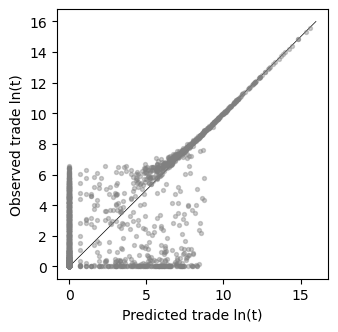

In [28]:
fig, ax = plt.subplots(figsize = (3.5,3.5))
plt.scatter(np.log(df_bil['trade_cal']), np.log(df_bil['q_calib']+1), s = 8, color = 'grey', alpha = 0.4, zorder = 3)
plt.plot(np.linspace(0,16, 100), np.linspace(0,16, 100), color = 'k', lw = 0.5, zorder = 1)
# plt.xlim(0, 12); 
plt.xlabel('Predicted trade ln(t)')
# plt.ylim(0, 12); 
plt.ylabel('Observed trade ln(t)')
plt.show()

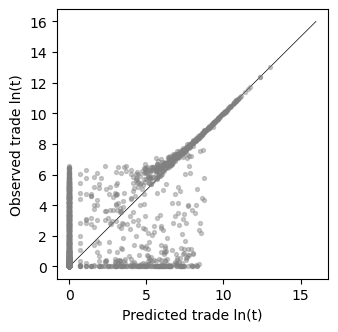

In [30]:
fig, ax = plt.subplots(figsize = (3.5,3.5))
plt.scatter(np.log(df_bil[df_bil['from_abbreviation']!=df_bil['to_abbreviation']]['trade_cal']), 
            np.log(df_bil[df_bil['from_abbreviation']!=df_bil['to_abbreviation']]['q_calib']+1), 
            s = 8, color = 'grey', alpha = 0.4, zorder = 3)
plt.plot(np.linspace(0,16, 100), np.linspace(0,16, 100), color = 'k', lw = 0.5, zorder = 1)
# plt.xlim(0, 12); 
plt.xlabel('Predicted trade ln(t)')
# plt.ylim(0, 12); 
plt.ylabel('Observed trade ln(t)')
plt.show()

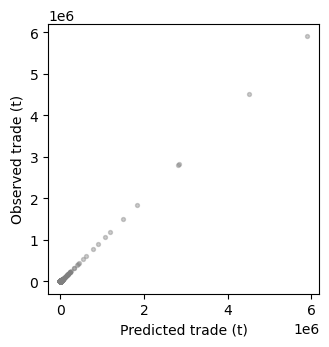

In [31]:
fig, ax = plt.subplots(figsize = (3.5,3.5))
plt.scatter(df_bil['trade_cal'], df_bil['q_calib'], s = 8, color = 'grey', alpha = 0.4, zorder = 3)
# plt.plot(np.linspace(0,16, 100), np.linspace(0,16, 100), color = 'k', lw = 0.5, zorder = 1)
# plt.xlim(0, 12); 
plt.xlabel('Predicted trade (t)')
# plt.ylim(0, 12); 
plt.ylabel('Observed trade (t)')
plt.show()

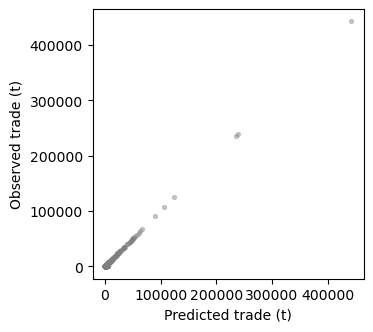

In [32]:
fig, ax = plt.subplots(figsize = (3.5,3.5))
plt.scatter(df_bil[df_bil['from_abbreviation']!=df_bil['to_abbreviation']]['trade_cal'], 
            df_bil[df_bil['from_abbreviation']!=df_bil['to_abbreviation']]['q_calib'], 
            s = 8, color = 'grey', alpha = 0.4, zorder = 3)
# plt.plot(np.linspace(0,16, 100), np.linspace(0,16, 100), color = 'k', lw = 0.5, zorder = 1)
# plt.xlim(0, 12); 
plt.xlabel('Predicted trade (t)')
# plt.ylim(0, 12); 
plt.ylabel('Observed trade (t)')
plt.show()

In [695]:
model_output = pd.read_csv('../../OPSIS/Data/Future_production_demand_data/IMPACT-output/IFPRI_model_output.csv')

In [696]:
model_output.head()

,Region,Commodity,SSP,Scenario,Impactparameter,Year,Val
0,EAP-Australia,AMT-Beef,SSP1,SSP1-RCP8.5-HGEM,QSupXAgg -- Commodity Supply,2050,3238.019688
1,EAP-Australia,AMT-Beef,SSP1,SSP1-NoCC,QSupXAgg -- Commodity Supply,2050,3301.767951
2,EAP-Australia,AMT-Beef,SSP1,SSP1-RCP8.5-HGEM,QSupXAgg -- Commodity Supply,2040,3061.296240
3,EAP-Australia,AMT-Beef,SSP1,SSP1-NoCC,QSupXAgg -- Commodity Supply,2040,3097.548293
4,EAP-Australia,AMT-Beef,SSP1,SSP1-RCP8.5-HGEM,QSupXAgg -- Commodity Supply,2030,2807.102095


In [697]:
### only for SSP2 multiple model runs, take output from 2010 out ###
SSP2 = model_output[(model_output['SSP']=='SSP2')&(model_output['Scenario']!='SSP2-RCP4.5-HGEM')&(model_output['Year']>2010)].reset_index(drop = True)

### process variables nicely ###
SSP2['Commodity_code'],SSP2['Commodity_name'] = SSP2['Commodity'].str.split('-', expand = True)[0],SSP2['Commodity'].str.split('-', expand = True)[1]
SSP2['Commodity_name'] = SSP2['Commodity_name'].str.replace(' ', '')
SSP2['Var_code'],SSP2['Var_name'] = SSP2['Impactparameter'].str.split(' -- ', expand = True)[0],SSP2['Impactparameter'].str.split(' -- ', expand = True)[1]

### remove unpacked columns
SSP2 = SSP2.drop(columns = ['Commodity','Impactparameter']).rename(columns = {'Commodity_name':'IMPACT_name'})

## set baseline ##
SSP2_2020 = SSP2[SSP2['Year']==2020][['Region','Commodity_code','IMPACT_name','Var_code','Var_name','Scenario','Val']].reset_index(drop = True).copy().rename(columns = {'Val':'Val_baseline'})
print(len(SSP2))
SSP2 = SSP2.merge(SSP2_2020, on = ['Region','Commodity_code','IMPACT_name','Var_code','Var_name','Scenario'], how = 'left')

### drop duplicates ##
#SSP2 = SSP2.drop_duplicates(subset = ['Scenario','Year','Region','IMPACT_name','Var_name'])
print(len(SSP2))


380064
380064


In [698]:
SSP2['Var_name'].unique()

array(['Commodity Supply', 'Total Demand', 'Animal Yield', 'Total Yield'],
      dtype=object)

In [699]:
SSP2['Var_code'].unique()

array(['QSupXAgg', 'QDXAgg', 'AnmlYldXAgg', 'TYldXAgg'], dtype=object)

In [700]:
SSP2['Year'].unique()

array([2050, 2040, 2030, 2020])

In [701]:
SSP2['IMPACT_name'].unique()

array(['Beef', 'Lamb', 'Pork', 'Poultry', 'Dairy', 'Eggs', 'Barley',
       'Maize', 'Millet', 'OtherCereals', 'Rice', 'Sorghum', 'Wheat',
       'Cacao', 'Coffee', 'Cotton', 'Other', 'Tea', 'Banana',
       'TemperateFruit', 'TropicalFruit', 'Vegetables', 'Groundnutmeal',
       'Othermeals', 'PalmKernelMeal', 'RapeseedMeal', 'SoybeanMeal',
       'SunflowerMeal', 'GroundnutOil', 'OtherOils', 'PalmFruitOil',
       'PalmKernelOil', 'RapeseedOil', 'SoybeanOil', 'SunflowerOil',
       'Groundnut', 'OtherOilseeds', 'Rapeseed', 'Soybean', 'Sunflower',
       'Beans', 'Chickpeas', 'Lentils', 'OtherPulses', 'Cassava',
       'OtherRoots', 'Potato', 'SweetPotato', 'Sugarcane', 'Sugar',
       'PalmFruit', 'PalmKernel'], dtype=object)

In [702]:
SSP2.head()

,Region,SSP,Scenario,Year,Val,Commodity_code,IMPACT_name,Var_code,Var_name,Val_baseline
0,EAP-Australia,SSP2,SSP2-RCP8.5-NORE,2050,3171.699220,AMT,Beef,QSupXAgg,Commodity Supply,2529.411069
1,EAP-Australia,SSP2,SSP2-RCP8.5-MIRO,2050,3143.161579,AMT,Beef,QSupXAgg,Commodity Supply,2525.500166
2,EAP-Australia,SSP2,SSP2-RCP8.5-IPSL,2050,3149.846790,AMT,Beef,QSupXAgg,Commodity Supply,2526.616833
3,EAP-Australia,SSP2,SSP2-RCP8.5-HGEM,2050,3124.257407,AMT,Beef,QSupXAgg,Commodity Supply,2523.564194
4,EAP-Australia,SSP2,SSP2-RCP8.5-GFDL,2050,3215.349318,AMT,Beef,QSupXAgg,Commodity Supply,2538.940192


In [703]:
SSP2 = SSP2[SSP2['Var_name']=='Total Yield']

In [704]:
SSP2.shape

(71232, 10)

In [705]:
SSP2.head()

,Region,SSP,Scenario,Year,Val,Commodity_code,IMPACT_name,Var_code,Var_name,Val_baseline
480,EAP-Australia,SSP2,SSP2-RCP8.5-NORE,2050,2.740254,CER,Barley,TYldXAgg,Total Yield,2.049672
481,EAP-Australia,SSP2,SSP2-RCP8.5-MIRO,2050,2.720572,CER,Barley,TYldXAgg,Total Yield,2.046791
482,EAP-Australia,SSP2,SSP2-RCP8.5-IPSL,2050,2.595181,CER,Barley,TYldXAgg,Total Yield,2.014886
483,EAP-Australia,SSP2,SSP2-RCP8.5-HGEM,2050,2.602117,CER,Barley,TYldXAgg,Total Yield,2.018240
484,EAP-Australia,SSP2,SSP2-RCP8.5-GFDL,2050,2.798624,CER,Barley,TYldXAgg,Total Yield,2.050278


In [706]:
SSP2['IMPACT_name'].nunique()

31

In [707]:
x = SSP2['IMPACT_name'].unique()
x.sort()
x

array(['Banana', 'Barley', 'Beans', 'Cacao', 'Cassava', 'Chickpeas',
       'Coffee', 'Cotton', 'Groundnut', 'Lentils', 'Maize', 'Millet',
       'Other', 'OtherCereals', 'OtherOilseeds', 'OtherPulses',
       'OtherRoots', 'PalmFruit', 'Potato', 'Rapeseed', 'Rice', 'Sorghum',
       'Soybean', 'Sugarcane', 'Sunflower', 'SweetPotato', 'Tea',
       'TemperateFruit', 'TropicalFruit', 'Vegetables', 'Wheat'],
      dtype=object)

In [708]:
SSP2['IMPACT_name'].value_counts()

IMPACT_name
Vegetables        3744
TemperateFruit    3576
Other             3528
Maize             3408
Potato            3336
OtherPulses       3312
TropicalFruit     3240
OtherOilseeds     3216
Wheat             2736
Beans             2712
Rice              2592
Groundnut         2568
Sorghum           2472
OtherCereals      2256
Banana            2232
Barley            2208
Soybean           2136
SweetPotato       2112
Sugarcane         2088
Cotton            2040
Millet            1968
Cassava           1800
OtherRoots        1776
Sunflower         1632
Coffee            1632
Rapeseed          1440
Lentils           1248
Chickpeas         1224
Cacao             1224
Tea               1056
PalmFruit          720
Name: count, dtype: int64

In [709]:
SSP2['Region'].nunique()

157

In [710]:
SSP2['Region'].value_counts()

Region
EAP-China                720
LAC-Mexico               720
SSA-Tanzania             696
SAS-India                672
SSA-Kenya                672
                        ... 
SSA-Equatorial Guinea    192
EAP-Mongolia             192
EUR-Norway               168
SSA-Djibouti              96
EUR-Iceland               48
Name: count, Length: 157, dtype: int64

In [711]:
SSP2['Scenario'].nunique()

6

In [712]:
SSP2['Scenario'].value_counts()

Scenario
SSP2-RCP8.5-NORE    11872
SSP2-RCP8.5-MIRO    11872
SSP2-RCP8.5-IPSL    11872
SSP2-RCP8.5-HGEM    11872
SSP2-RCP8.5-GFDL    11872
SSP2-NoCC           11872
Name: count, dtype: int64

In [713]:
SSP2['Year'].nunique()

4

In [714]:
SSP2['Year'].value_counts()

Year
2050    17808
2040    17808
2030    17808
2020    17808
Name: count, dtype: int64

In [715]:
31*157*6*4

116808

'jwhea', 'jrice', 'jmaiz', 
'jbarl', 'jmill', 'jsorg', 
'jocer', 'jcass', 'jpota', 
'jyams', 'jswpt', 'jorat', 
'jvege', 'jbana', 'jplnt', 
'jsubf', 'jtemf', 'jbean', 
'jchkp', 'jcowp', 'jlent', 
'jpigp', 'jopul', 'jsoyb',
'jgrnd', 'jothr', 'jrpsd', 
'jsnfl', 'jtols', 'jpalm', 
'jsugb', 'jsugc'


problem crops (start with the scenarios for the others for now):
millet: 0.08 r2 for prices, prices are also scaled down to as much as 20%, which doesn't happen often for other crops) 
bean, chkp, cowp, lent, pigp, opul: negative or almost 0 r2, prices are scaled down quite often and to as much as 20%
grnd: calibration was extremely difficult!!!! uzbekistan has 4e8 price??? check fao data
rpsd, snfl: negative r2, scatterplot looks weird, prices are scaled down to as much as 20%
tols: uzbekistan has a price of 4e8 (probably because og groundnut again)

when is calib a problem? its usually close to 0, but all crops have right skews

In [716]:
crop_code = 'jorat'
country_file = pd.read_csv(f'{data_dir}/Input/Country_data/country_information_'+str(crop_code)+'.csv')
bil_file = pd.read_csv(f'{data_dir}/Input/Trade_cost/bilateral_trade_cost_'+str(crop_code)+'.csv')

cal_tc = pd.read_csv(f'{calibration_output}/tc_calibration_{crop_code}.csv', header=None, names=['from_abbreviation', 'to_abbreviation', 'tc_cal'])
cal_price = pd.read_csv(f'{calibration_output}/prodprice_calibration_{crop_code}.csv', header=None, names=['abbreviation', 'price_cal'])
calib = pd.read_csv(f'{calibration_output}/calib_calibration_{crop_code}.csv', header=None, names=['from_abbreviation', 'to_abbreviation', 'calib'])

price_compare = country_file.merge(cal_price)
tc_compare = bil_file.merge(cal_tc)

     from_abbreviation to_abbreviation     calib
2210               G43             G27  0.096332
2228               G43             G45  0.098549
1028               G20             G41  0.170564
2201               G43             G18  0.204519
1837               G36             G18  0.214451
1843               G36             G24  0.236137
2218               G43             G35  0.478294
2200               G43             G17  0.636850
1572               G31             G13  1.167244
1611               G31             G52  1.487730


<Axes: >

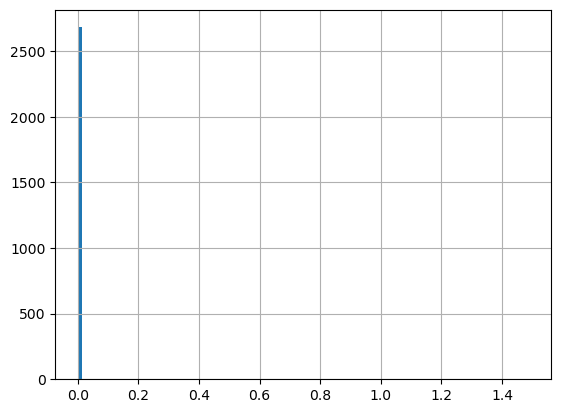

In [717]:
#calib
print(calib.sort_values(by='calib').tail(10))
calib['calib'].hist(bins=100)

In [718]:
#tc
print(np.sqrt(mean_squared_error(tc_compare['trade_USD_t'], tc_compare['tc_cal'])))
print(r2_score(tc_compare['trade_USD_t'], tc_compare['tc_cal']))
print((tc_compare['tc_cal'] / tc_compare['trade_USD_t']).describe())
sns.scatterplot(x=tc_compare['trade_USD_t'], y=tc_compare['tc_cal'])

ValueError: Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.

823.6513087467628
0.5473183041975516
count    120.000000
mean       0.807024
std        0.458573
min        0.200000
25%        0.506385
50%        0.819702
75%        0.899273
max        3.000000
dtype: float64


<Axes: xlabel='prod_price_USD_t', ylabel='price_cal'>

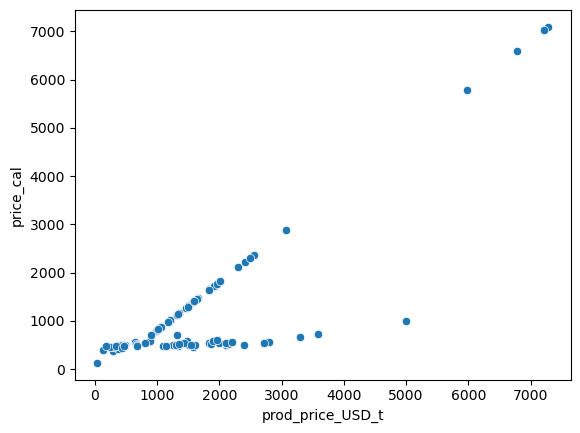

In [ ]:
#prod price
print(np.sqrt(mean_squared_error(price_compare['prod_price_USD_t'], price_compare['price_cal'])))
print(r2_score(price_compare['prod_price_USD_t'], price_compare['price_cal']))
print((price_compare['price_cal'] / price_compare['prod_price_USD_t']).describe())
sns.scatterplot(x=price_compare['prod_price_USD_t'], y=price_compare['price_cal'])

In [ ]:
price_compare[(price_compare['price_cal']<200) & (price_compare['prod_price_USD_t']>500)]

,abbreviation,IMPACT_code,yield_t_ha,prod_price_USD_t,import_q,export_q,demand_q,supply_q,domestic_q,demand_elas,supply_elas,price_cal
19,CAF,jrpsd,1.694848,598.617581,21.589532,0.0,21.589532,0.0,0.0,-0.563942,1.1718,192.377370
26,COD,jrpsd,1.694848,598.617581,1.258140,0.0,1.258140,0.0,0.0,-0.553317,1.1718,178.906447
123,TCD,jrpsd,1.694848,598.617581,3.058641,0.0,3.058641,0.0,0.0,-0.555412,0.8316,182.633749


In [ ]:
price_compare[(price_compare['prod_price_USD_t']>1e8)]

,abbreviation,IMPACT_code,yield_t_ha,prod_price_USD_t,import_q,export_q,demand_q,supply_q,domestic_q,demand_elas,supply_elas,price_cal
144,UZB,jtols,1.763412,4.205225e+08,23601.112415,43057.980476,7119.384347,26576.252407,-16481.728068,-0.30331,0.7938,2.412115e+08


In [ ]:
price_compare[price_compare['abbreviation']=='KOR']

,abbreviation,IMPACT_code,yield_t_ha,prod_price_USD_t,import_q,export_q,demand_q,supply_q,domestic_q,demand_elas,supply_elas,price_cal
75,KOR,jtemf,13.928295,1854.540096,113296.53841,39809.99929,1.643176e+06,1569689.0,1.529879e+06,-0.355639,0.352,1103.329394
